In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime

In [2]:
covid_county_data = open('/Users/yujia/Desktop/NWU/396_DS/Proj/covid-19-data/us-counties.csv')
df_covid_county = pd.read_csv(covid_county_data)
df_covid_county[['fips']]= df_covid_county[['fips']].values.astype(int)
df_covid_county_78 = df_covid_county[290261: 489196]
df_grouped_78 = df_covid_county_78.groupby(['county', 'fips'])['cases'].sum().reset_index(name="cases_sum_78")
df_grouped_78.head()

county   fips  cases_sum_78
0  Abbeville  45001         17041
1     Acadia  22001        131924
2   Accomack  51001         67189
3        Ada  16001        460979
4      Adair  19001          1700

In [3]:
df_covid_county_56 = df_covid_county[103870: 290261]
df_grouped_56 = df_covid_county_56.groupby(['county', 'fips'])['cases'].sum().reset_index(name="cases_sum_56")
df_grouped_56.head()

county   fips  cases_sum_56
0  Abbeville  45001          3267
1     Acadia  22001         25571
2   Accomack  51001         49157
3        Ada  16001         58227
4      Adair  19001           493

In [4]:
covid_mask_data = open('/Users/yujia/Desktop/NWU/396_DS/Proj/covid-19-data/mask-use/mask-use-by-county.csv')
df_covid_mask = pd.read_csv(covid_mask_data)
df_covid_mask.rename(columns={'COUNTYFP':'fips'}, inplace = True)
df_covid_mask.head()

fips  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0  1001  0.053   0.074      0.134       0.295   0.444
1  1003  0.083   0.059      0.098       0.323   0.436
2  1005  0.067   0.121      0.120       0.201   0.491
3  1007  0.020   0.034      0.096       0.278   0.572
4  1009  0.053   0.114      0.180       0.194   0.459

In [5]:
merge_78 = pd.merge(df_grouped_78, df_covid_mask, on='fips')
merge_78.head()

county   fips  cases_sum_78  NEVER  RARELY  SOMETIMES  FREQUENTLY  \
0  Abbeville  45001         17041  0.117   0.102      0.243       0.166   
1     Acadia  22001        131924  0.122   0.111      0.138       0.265   
2   Accomack  51001         67189  0.001   0.019      0.055       0.100   
3        Ada  16001        460979  0.118   0.078      0.084       0.194   
4      Adair  19001          1700  0.073   0.128      0.128       0.307   

   ALWAYS  
0   0.371  
1   0.362  
2   0.824  
3   0.526  
4   0.364

In [6]:
merge_56 = pd.merge(df_grouped_56, df_covid_mask, on='fips')
merge_56.head()

county   fips  cases_sum_56  NEVER  RARELY  SOMETIMES  FREQUENTLY  \
0  Abbeville  45001          3267  0.117   0.102      0.243       0.166   
1     Acadia  22001         25571  0.122   0.111      0.138       0.265   
2   Accomack  51001         49157  0.001   0.019      0.055       0.100   
3        Ada  16001         58227  0.118   0.078      0.084       0.194   
4      Adair  19001           493  0.073   0.128      0.128       0.307   

   ALWAYS  
0   0.371  
1   0.362  
2   0.824  
3   0.526  
4   0.364

In [7]:
merge_data = pd.merge(merge_56[['fips', 'cases_sum_56']], merge_78, on='fips')
merge_data.head()

fips  cases_sum_56     county  cases_sum_78  NEVER  RARELY  SOMETIMES  \
0  45001          3267  Abbeville         17041  0.117   0.102      0.243   
1  22001         25571     Acadia        131924  0.122   0.111      0.138   
2  51001         49157   Accomack         67189  0.001   0.019      0.055   
3  16001         58227        Ada        460979  0.118   0.078      0.084   
4  19001           493      Adair          1700  0.073   0.128      0.128   

   FREQUENTLY  ALWAYS  
0       0.166   0.371  
1       0.265   0.362  
2       0.100   0.824  
3       0.194   0.526  
4       0.307   0.364

In [8]:
d = merge_data.to_dict('dict')

In [9]:
d['ratio'] = {}
d['mask rate'] = {}
for i in d['fips']:
    d['ratio'][i] = d['cases_sum_78'][i] / d['cases_sum_56'][i]
    d['mask rate'][i] = d['RARELY'][i] * 0.25 + d['SOMETIMES'][i] * 0.5 + d['FREQUENTLY'][i] * 0.75 + d['ALWAYS'][i] * 1

In [10]:
comparison = pd.DataFrame(d)
comparison.head()

fips  cases_sum_56     county  cases_sum_78  NEVER  RARELY  SOMETIMES  \
0  45001          3267  Abbeville         17041  0.117   0.102      0.243   
1  22001         25571     Acadia        131924  0.122   0.111      0.138   
2  51001         49157   Accomack         67189  0.001   0.019      0.055   
3  16001         58227        Ada        460979  0.118   0.078      0.084   
4  19001           493      Adair          1700  0.073   0.128      0.128   

   FREQUENTLY  ALWAYS     ratio  mask rate  
0       0.166   0.371  5.216100    0.64250  
1       0.265   0.362  5.159126    0.65750  
2       0.100   0.824  1.366825    0.93125  
3       0.194   0.526  7.916929    0.73300  
4       0.307   0.364  3.448276    0.69025

Text(0.5, 1.0, 'Box plot of mask-wearing rate')

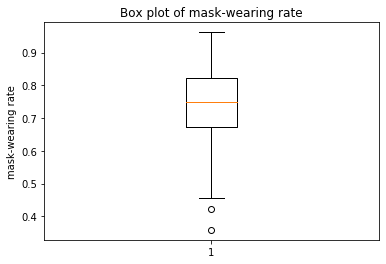

In [11]:
plt.boxplot(comparison['mask rate'])
plt.ylabel('mask-wearing rate')
plt.title('Box plot of mask-wearing rate')

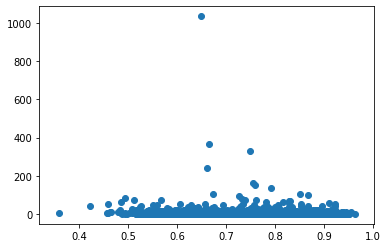

In [12]:
plt.scatter(comparison['mask rate'], comparison['ratio'])

In [13]:
comparison_select = comparison[comparison['ratio'] <= 20]

In [14]:
comparison_select

fips  cases_sum_56     county  cases_sum_78  NEVER  RARELY  SOMETIMES  \
0     45001          3267  Abbeville         17041  0.117   0.102      0.243   
1     22001         25571     Acadia        131924  0.122   0.111      0.138   
2     51001         49157   Accomack         67189  0.001   0.019      0.055   
3     16001         58227        Ada        460979  0.118   0.078      0.084   
4     19001           493      Adair          1700  0.073   0.128      0.128   
...     ...           ...        ...           ...    ...     ...        ...   
3036   4027        119505       Yuma        639410  0.008   0.013      0.046   
3037   8125          1873       Yuma          3655  0.038   0.284      0.133   
3038  48505           963     Zapata          9404  0.047   0.001      0.035   
3039  48507           631     Zavala         11731  0.036   0.075      0.115   
3040  46137            85    Ziebach          1148  0.105   0.053      0.172   

      FREQUENTLY  ALWAYS      ratio  mask rate  
0          0.166   0.371   5.216100    0.64250  
1          0.265   0.362   5.159126    0.65750  
2          0.100   0.824   1.366825    0.93125  
3          0.194   0.526   7.916929    0.73300  
4          0.307   0.364   3.448276    0.69025  
...          ...     ...        ...        ...  
3036       0.129   0.804   5.350487    0.92700  
3037       0.255   0.290   1.951415    0.61875  
3038       0.138   0.779   9.765317    0.90025  
3039       0.138   0.635  18.591125    0.81475  
3040       0.235   0.434  13.505882    0.70950  

[2934 rows x 11 columns]

Text(0, 0.5, 'ratio')

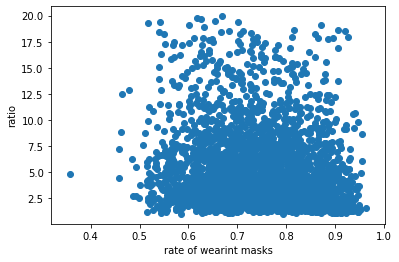

In [15]:
plt.scatter(comparison_select['mask rate'], comparison_select['ratio'])
plt.xlabel('rate of wearint masks')
plt.ylabel('ratio')

In [16]:
stats.pearsonr(list(comparison_select['mask rate']), list(comparison_select['ratio']))

(-0.18235065536808517, 2.3585264752960782e-23)

In [17]:
stats.spearmanr(list(comparison_select['mask rate']), list(comparison_select['ratio']))

SpearmanrResult(correlation=-0.21648601893687067, pvalue=1.8599796763856568e-32)

In [18]:
covid_interventions_data = open('/Users/yujia/Desktop/NWU/396_DS/Proj/COVID-19_US_County-level_Summaries/data/interventions.csv')
df_interventions = pd.read_csv(covid_interventions_data)
df_interventions.head()

FIPS STATE       AREA_NAME  stay at home  >50 gatherings  >500 gatherings  \
0     0    US   united states           NaN             NaN              NaN   
1  1000    AL         alabama      737519.0        737504.0         737497.0   
2  1001    AL  autauga county      737519.0        737504.0         737497.0   
3  1003    AL  baldwin county      737519.0        737504.0         737497.0   
4  1005    AL  barbour county      737519.0        737504.0         737497.0   

   public schools  restaurant dine-in  entertainment/gym  federal guidelines  \
0             NaN                 NaN                NaN                 NaN   
1        737500.0            737503.0           737512.0            737500.0   
2        737500.0            737503.0           737512.0            737500.0   
3        737500.0            737503.0           737512.0            737500.0   
4        737500.0            737503.0           737512.0            737500.0   

   foreign travel ban  stay at home rollback  >50 gatherings rollback  \
0                 NaN                    NaN                      NaN   
1            737495.0               737545.0                      NaN   
2            737495.0               737545.0                      NaN   
3            737495.0               737545.0                      NaN   
4            737495.0               737545.0                      NaN   

   >500 gatherings rollback  restaurant dine-in rollback  \
0                       NaN                          NaN   
1                       NaN                     737556.0   
2                       NaN                     737556.0   
3                       NaN                     737556.0   
4                       NaN                     737556.0   

   entertainment/gym rollback  
0                         NaN  
1                    737556.0  
2                    737556.0  
3                    737556.0  
4                    737556.0

In [19]:
interventions = df_interventions.to_dict('dict')
#interventions

In [20]:
inter = {}
inter['FIPS'] = {}
inter['stay at home 56'] = {}
inter['stay at home 78'] = {}
inter['>50 gatherings 56'] = {}
inter['>50 gatherings 78'] = {}
inter['>500 gatherings 56'] = {}
inter['>500 gatherings 78'] = {}
inter['restaurant dine-in 56'] = {}
inter['restaurant dine-in 78'] = {}
inter['entertainment/gym 56'] = {}
inter['entertainment/gym 78'] = {}
inter['public schools 56'] = {}
inter['public schools 78'] = {}
inter['federal guidelines 56'] = {}
inter['federal guidelines 78'] = {}
inter['foreign travel ban 56'] = {}
inter['foreign travel ban 78'] = {}
for i in interventions['FIPS']:
    if i == 0:
        continue
    inter['FIPS'][i] = interventions['FIPS'][i]
    
    # stay at home
    if np.isnan(df_interventions['stay at home'][i]):
        sm = 8
        sd = 31
        em = 8
        ed = 31
    elif np.isnan(df_interventions['stay at home rollback'][i]):
        start_date = datetime.date.fromordinal(int(df_interventions['stay at home'][i]))
        sm = start_date.month
        sd = start_date.day
        em = 8
        ed = 31
    else:
        start_date = datetime.date.fromordinal(int(df_interventions['stay at home'][i]))
        end_date = datetime.date.fromordinal(int(df_interventions['stay at home rollback'][i]))
        sm = start_date.month
        sd = start_date.day
        em = end_date.month
        ed = end_date.day
    last_56 = min(6, em) - max(5, sm)
    if last_56 <= 0:
        inter['stay at home 56'][i] = 0
    elif last_56 >= 1:
        inter['stay at home 56'][i] = 1
    else:
        inter['stay at home 56'][i] = last_56
    last_78 = min(8, em) - max(7, sm)
    if last_78 <= 0:
        inter['stay at home 78'][i] = 0
    elif last_78 >= 1:
        inter['stay at home 78'][i] = 1
    else:
        inter['stay at home 78'][i] = last_78
    
    # avoid >50 gatherings
    if np.isnan(df_interventions['>50 gatherings'][i]):
        sm = 8
        sd = 31
        em = 8
        ed = 31
    elif np.isnan(df_interventions['>50 gatherings rollback'][i]):
        start_date = datetime.date.fromordinal(int(df_interventions['>50 gatherings'][i]))
        sm = start_date.month
        sd = start_date.day
        em = 8
        ed = 31
    else:
        start_date = datetime.date.fromordinal(int(df_interventions['>50 gatherings'][i]))
        end_date = datetime.date.fromordinal(int(df_interventions['>50 gatherings rollback'][i]))
        sm = start_date.month
        sd = start_date.day
        em = end_date.month
        ed = end_date.day
    last_56 = min(6, em) - max(5, sm)
    if last_56 <= 0:
        inter['>50 gatherings 56'][i] = 0
    elif last_56 >= 1:
        inter['>50 gatherings 56'][i] = 1
    else:
        inter['>50 gatherings 56'][i] = last_56
    last_78 = min(8, em) - max(7, sm)
    if last_78 <= 0:
        inter['>50 gatherings 78'][i] = 0
    elif last_78 >= 1:
        inter['>50 gatherings 78'][i] = 1
    else:
        inter['>50 gatherings 78'][i] = last_78
    
    # avoid >500 gatherings
    if np.isnan(df_interventions['>500 gatherings'][i]):
        sm = 8
        sd = 31
        em = 8
        ed = 31
    elif np.isnan(df_interventions['>500 gatherings rollback'][i]):
        start_date = datetime.date.fromordinal(int(df_interventions['>500 gatherings'][i]))
        sm = start_date.month
        sd = start_date.day
        em = 8
        ed = 31
    else:
        start_date = datetime.date.fromordinal(int(df_interventions['>500 gatherings'][i]))
        end_date = datetime.date.fromordinal(int(df_interventions['>500 gatherings rollback'][i]))
        sm = start_date.month
        sd = start_date.day
        em = end_date.month
        ed = end_date.day
    last_56 = min(6, em) - max(5, sm)
    if last_56 <= 0:
        inter['>500 gatherings 56'][i] = 0
    elif last_56 >= 1:
        inter['>500 gatherings 56'][i] = 1
    else:
        inter['>500 gatherings 56'][i] = last_56
    last_78 = min(8, em) - max(7, sm)
    if last_78 <= 0:
        inter['>500 gatherings 78'][i] = 0
    elif last_78 >= 1:
        inter['>500 gatherings 78'][i] = 1
    else:
        inter['>500 gatherings 78'][i] = last_78
    
    # avoid restaurant dine-in
    if np.isnan(df_interventions['restaurant dine-in'][i]):
        sm = 8
        sd = 31
        em = 8
        ed = 31
    elif np.isnan(df_interventions['restaurant dine-in rollback'][i]):
        start_date = datetime.date.fromordinal(int(df_interventions['restaurant dine-in'][i]))
        sm = start_date.month
        sd = start_date.day
        em = 8
        ed = 31
    else:
        start_date = datetime.date.fromordinal(int(df_interventions['restaurant dine-in'][i]))
        end_date = datetime.date.fromordinal(int(df_interventions['restaurant dine-in rollback'][i]))
        sm = start_date.month
        sd = start_date.day
        em = end_date.month
        ed = end_date.day
    last_56 = min(6, em) - max(5, sm)
    if last_56 <= 0:
        inter['restaurant dine-in 56'][i] = 0
    elif last_56 >= 1:
        inter['restaurant dine-in 56'][i] = 1
    else:
        inter['restaurant dine-in 56'][i] = last_56
    last_78 = min(8, em) - max(7, sm)
    if last_78 <= 0:
        inter['restaurant dine-in 78'][i] = 0
    elif last_78 >= 1:
        inter['restaurant dine-in 78'][i] = 1
    else:
        inter['restaurant dine-in 78'][i] = last_78
    
    # avoid entertainment/gym
    if np.isnan(df_interventions['entertainment/gym'][i]):
        sm = 8
        sd = 31
        em = 8
        ed = 31
    elif np.isnan(df_interventions['entertainment/gym rollback'][i]):
        start_date = datetime.date.fromordinal(int(df_interventions['entertainment/gym'][i]))
        sm = start_date.month
        sd = start_date.day
        em = 8
        ed = 31
    else:
        start_date = datetime.date.fromordinal(int(df_interventions['entertainment/gym'][i]))
        end_date = datetime.date.fromordinal(int(df_interventions['entertainment/gym rollback'][i]))
        sm = start_date.month
        sd = start_date.day
        em = end_date.month
        ed = end_date.day
    last_56 = min(6, em) - max(5, sm)
    if last_56 <= 0:
        inter['entertainment/gym 56'][i] = 0
    elif last_56 >= 1:
        inter['entertainment/gym 56'][i] = 1
    else:
        inter['entertainment/gym 56'][i] = last_56
    last_78 = min(8, em) - max(7, sm)
    if last_78 <= 0:
        inter['entertainment/gym 78'][i] = 0
    elif last_78 >= 1:
        inter['entertainment/gym 78'][i] = 1
    else:
        inter['entertainment/gym 78'][i] = last_78
    
    # close public schools
    if np.isnan(df_interventions['public schools'][i]):
        inter['public schools 56'][i] = 0
        inter['public schools 78'][i] = 0
    else:
        date = datetime.date.fromordinal(int(df_interventions['public schools'][i]))
        m = date.month
        d = date.day
        if m <= 5:
            inter['public schools 56'][i] = 1
        else:
            inter['public schools 56'][i] = 0
        if m <= 7:
            inter['public schools 78'][i] = 1
        else:
            inter['public schools 78'][i] = 0
    
    # federal guidelines
    if np.isnan(df_interventions['federal guidelines'][i]):
        inter['federal guidelines 56'][i] = 0
        inter['federal guidelines 78'][i] = 0
    else:
        date = datetime.date.fromordinal(int(df_interventions['federal guidelines'][i]))
        m = date.month
        d = date.day
        if m <= 5:
            inter['federal guidelines 56'][i] = 1
        else:
            inter['federal guidelines 56'][i] = 0
        if m <= 7:
            inter['federal guidelines 78'][i] = 1
        else:
            inter['federal guidelines 78'][i] = 0
    
    # foreign travel ban
    if np.isnan(df_interventions['foreign travel ban'][i]):
        inter['foreign travel ban 56'][i] = 0
        inter['foreign travel ban 78'][i] = 0
    else:
        date = datetime.date.fromordinal(int(df_interventions['foreign travel ban'][i]))
        m = date.month
        d = date.day
        if m <= 5:
            inter['foreign travel ban 56'][i] = 1
        else:
            inter['foreign travel ban 56'][i] = 0
        if m <= 7:
            inter['foreign travel ban 78'][i] = 1
        else:
            inter['foreign travel ban 78'][i] = 0

In [21]:
df_inter = pd.DataFrame(inter)
df_inter.rename(columns={'FIPS':'fips'}, inplace = True)
df_inter.head()

fips  stay at home 56  stay at home 78  >50 gatherings 56  \
1  1000                0                0                  1   
2  1001                0                0                  1   
3  1003                0                0                  1   
4  1005                0                0                  1   
5  1007                0                0                  1   

   >50 gatherings 78  >500 gatherings 56  >500 gatherings 78  \
1                  1                   1                   1   
2                  1                   1                   1   
3                  1                   1                   1   
4                  1                   1                   1   
5                  1                   1                   1   

   restaurant dine-in 56  restaurant dine-in 78  entertainment/gym 56  \
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   
5                      0                      0                     0   

   entertainment/gym 78  public schools 56  public schools 78  \
1                     0                  1                  1   
2                     0                  1                  1   
3                     0                  1                  1   
4                     0                  1                  1   
5                     0                  1                  1   

   federal guidelines 56  federal guidelines 78  foreign travel ban 56  \
1                      1                      1                      1   
2                      1                      1                      1   
3                      1                      1                      1   
4                      1                      1                      1   
5                      1                      1                      1   

   foreign travel ban 78  
1                      1  
2                      1  
3                      1  
4                      1  
5                      1

In [22]:
final_data = pd.merge(comparison[['fips', 'mask rate', 'ratio']], df_inter, on='fips')
final_data.head()

fips  mask rate     ratio  stay at home 56  stay at home 78  \
0  45001    0.64250  5.216100                0                0   
1  22001    0.65750  5.159126                0                0   
2  51001    0.93125  1.366825                0                0   
3  16001    0.73300  7.916929                0                0   
4  19001    0.69025  3.448276                0                0   

   >50 gatherings 56  >50 gatherings 78  >500 gatherings 56  \
0                  1                  0                   1   
1                  1                  0                   1   
2                  1                  1                   1   
3                  0                  0                   1   
4                  1                  1                   1   

   >500 gatherings 78  restaurant dine-in 56  restaurant dine-in 78  \
0                   0                      0                      0   
1                   0                      0                      0   
2                   1                      0                      0   
3                   0                      0                      0   
4                   1                      0                      0   

   entertainment/gym 56  entertainment/gym 78  public schools 56  \
0                     0                     0                  1   
1                     0                     0                  1   
2                     0                     0                  1   
3                     0                     0                  1   
4                     0                     0                  1   

   public schools 78  federal guidelines 56  federal guidelines 78  \
0                  1                      1                      1   
1                  1                      1                      1   
2                  1                      1                      1   
3                  1                      1                      1   
4                  1                      1                      1   

   foreign travel ban 56  foreign travel ban 78  
0                      1                      1  
1                      1                      1  
2                      1                      1  
3                      1                      1  
4                      1                      1

In [23]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 3040
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fips                   3041 non-null   int64  
 1   mask rate              3041 non-null   float64
 2   ratio                  3041 non-null   float64
 3   stay at home 56        3041 non-null   int64  
 4   stay at home 78        3041 non-null   int64  
 5   >50 gatherings 56      3041 non-null   int64  
 6   >50 gatherings 78      3041 non-null   int64  
 7   >500 gatherings 56     3041 non-null   int64  
 8   >500 gatherings 78     3041 non-null   int64  
 9   restaurant dine-in 56  3041 non-null   int64  
 10  restaurant dine-in 78  3041 non-null   int64  
 11  entertainment/gym 56   3041 non-null   int64  
 12  entertainment/gym 78   3041 non-null   int64  
 13  public schools 56      3041 non-null   int64  
 14  public schools 78      3041 non-null   int64  
 15  fede

In [24]:
final_data.describe()

fips    mask rate        ratio  stay at home 56  \
count   3041.000000  3041.000000  3041.000000      3041.000000   
mean   30348.783295     0.747597     7.008148         0.191056   
std    15232.455309     0.101978    22.966997         0.393197   
min     1001.000000     0.358250     1.016393         0.000000   
25%    18157.000000     0.674000     2.470764         0.000000   
50%    29131.000000     0.749750     4.064643         0.000000   
75%    45085.000000     0.823750     7.102193         0.000000   
max    56045.000000     0.962250  1035.000000         1.000000   

       stay at home 78  >50 gatherings 56  >50 gatherings 78  \
count      3041.000000        3041.000000        3041.000000   
mean          0.032226           0.803025           0.605064   
std           0.176629           0.397778           0.488917   
min           0.000000           0.000000           0.000000   
25%           0.000000           1.000000           0.000000   
50%           0.000000           1.000000           1.000000   
75%           0.000000           1.000000           1.000000   
max           1.000000           1.000000           1.000000   

       >500 gatherings 56  >500 gatherings 78  restaurant dine-in 56  \
count         3041.000000         3041.000000            3041.000000   
mean             0.860243            0.672147               0.258468   
std              0.346791            0.469508               0.437864   
min              0.000000            0.000000               0.000000   
25%              1.000000            0.000000               0.000000   
50%              1.000000            1.000000               0.000000   
75%              1.000000            1.000000               1.000000   
max              1.000000            1.000000               1.000000   

       restaurant dine-in 78  entertainment/gym 56  entertainment/gym 78  \
count            3041.000000           3041.000000           3041.000000   
mean                0.106873              0.286090              0.132522   
std                 0.309002              0.452006              0.339113   
min                 0.000000              0.000000              0.000000   
25%                 0.000000              0.000000              0.000000   
50%                 0.000000              0.000000              0.000000   
75%                 0.000000              1.000000              0.000000   
max                 1.000000              1.000000              1.000000   

       public schools 56  public schools 78  federal guidelines 56  \
count             3041.0             3041.0                 3041.0   
mean                 1.0                1.0                    1.0   
std                  0.0                0.0                    0.0   
min                  1.0                1.0                    1.0   
25%                  1.0                1.0                    1.0   
50%                  1.0                1.0                    1.0   
75%                  1.0                1.0                    1.0   
max                  1.0                1.0                    1.0   

       federal guidelines 78  foreign travel ban 56  foreign travel ban 78  
count                 3041.0                 3041.0                 3041.0  
mean                     1.0                    1.0                    1.0  
std                      0.0                    0.0                    0.0  
min                      1.0                    1.0                    1.0  
25%                      1.0                    1.0                    1.0  
50%                      1.0                    1.0                    1.0  
75%                      1.0                    1.0                    1.0  
max                      1.0                    1.0                    1.0

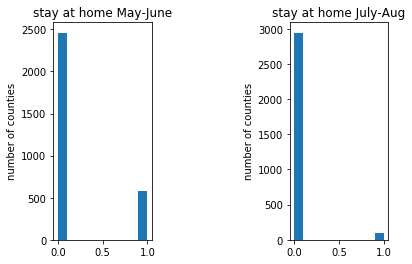

In [25]:
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((1,3),(0,0))
plt.hist(final_data['stay at home 56'])
plt.title('stay at home May-June')
plt.ylabel('number of counties') 

plt.subplot2grid((1,3),(0,2))
plt.hist(final_data['stay at home 78'])
plt.title('stay at home July-Aug')
plt.ylabel('number of counties') 

plt.show()

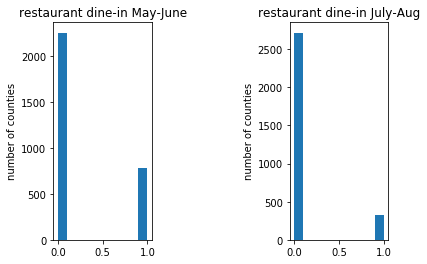

In [26]:
fig = plt.figure()
fig.set(alpha=0.2)


plt.subplot2grid((1,3),(0,0))
plt.hist(final_data['restaurant dine-in 56'])
plt.title('restaurant dine-in May-June')
plt.ylabel('number of counties') 

plt.subplot2grid((1,3),(0,2))
plt.hist(final_data['restaurant dine-in 78'])
plt.title('restaurant dine-in July-Aug')
plt.ylabel('number of counties')

plt.show()

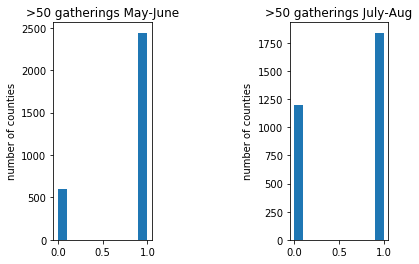

In [27]:
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((1,3),(0,0))
plt.hist(final_data['>50 gatherings 56'])
plt.title('>50 gatherings May-June')
plt.ylabel('number of counties') 

plt.subplot2grid((1,3),(0,2))
plt.hist(final_data['>50 gatherings 78'])
plt.title('>50 gatherings July-Aug')
plt.ylabel('number of counties') 

plt.show()

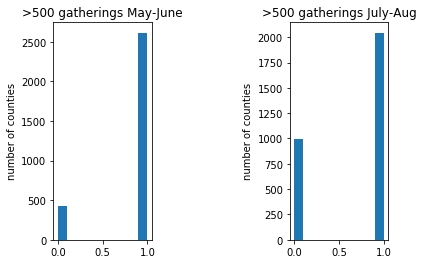

In [28]:
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((1,3),(0,0))
plt.hist(final_data['>500 gatherings 56'])
plt.title('>500 gatherings May-June')
plt.ylabel('number of counties') 

plt.subplot2grid((1,3),(0,2))
plt.hist(final_data['>500 gatherings 78'])
plt.title('>500 gatherings July-Aug')
plt.ylabel('number of counties') 

plt.show()

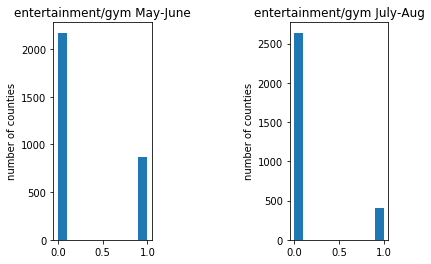

In [29]:
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((1,3),(0,0))
plt.hist(final_data['entertainment/gym 56'])
plt.title('entertainment/gym May-June')
plt.ylabel('number of counties') 

plt.subplot2grid((1,3),(0,2))
plt.hist(final_data['entertainment/gym 78'])
plt.title('entertainment/gym July-Aug')
plt.ylabel('number of counties') 

plt.show()